<a href="https://colab.research.google.com/github/gingerthorp/open-research/blob/main/%EC%BD%94%EC%8A%A4%EB%8B%A5%26%EC%86%8C%ED%98%95%EC%A7%80%EC%88%98_%EC%83%81%EA%B4%80%EC%84%B1_%EB%B0%8F_%EB%B2%A0%ED%83%80_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install finance-datareader

In [2]:
import FinanceDataReader as fdr
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [3]:
# 데이터 불러오기
tikers = [
          ('KOSPI','KS11'),
          ('KOSDAQ','KQ11'),
          ('KOSDAQ_SMALL','KQSM')
          ]
descs = [desc for desc, ticker in tikers] # 데이터 설명.

index_data = [fdr.DataReader(ticker, '2010-01-01')['Close'] for desc, ticker in tikers] # 데이터 다운로드

# 데이터 전처리
df = pd.concat(index_data, axis=1)
df.columns = descs
df = df.dropna(axis=0)

In [4]:
# 롤링 상관성 함수
def rolling_corr(X, Y, m):
  return X.rolling(20*m).corr(Y)

In [5]:
def rolling_beta(X, Y, m):
  cov = X.rolling(20*m).cov(Y)
  var = X.rolling(20*m).var()
  return cov / var

In [6]:
# 6개월 롤링 상관성
ks_kq = rolling_corr(df['KOSPI'], df['KOSDAQ'], 6)
ks_kq_sm = rolling_corr(df['KOSPI'], df['KOSDAQ_SMALL'], 6)
kd_kq_sm = rolling_corr(df['KOSDAQ'], df['KOSDAQ_SMALL'], 6)

# 6개월 롤링 베타
b_ks_kq = rolling_beta(df['KOSPI'], df['KOSDAQ'], 6)
b_ks_kq_sm = rolling_beta(df['KOSPI'], df['KOSDAQ'], 6)
b_kq_kq_sm = rolling_beta(df['KOSDAQ'], df['KOSDAQ_SMALL'], 6)

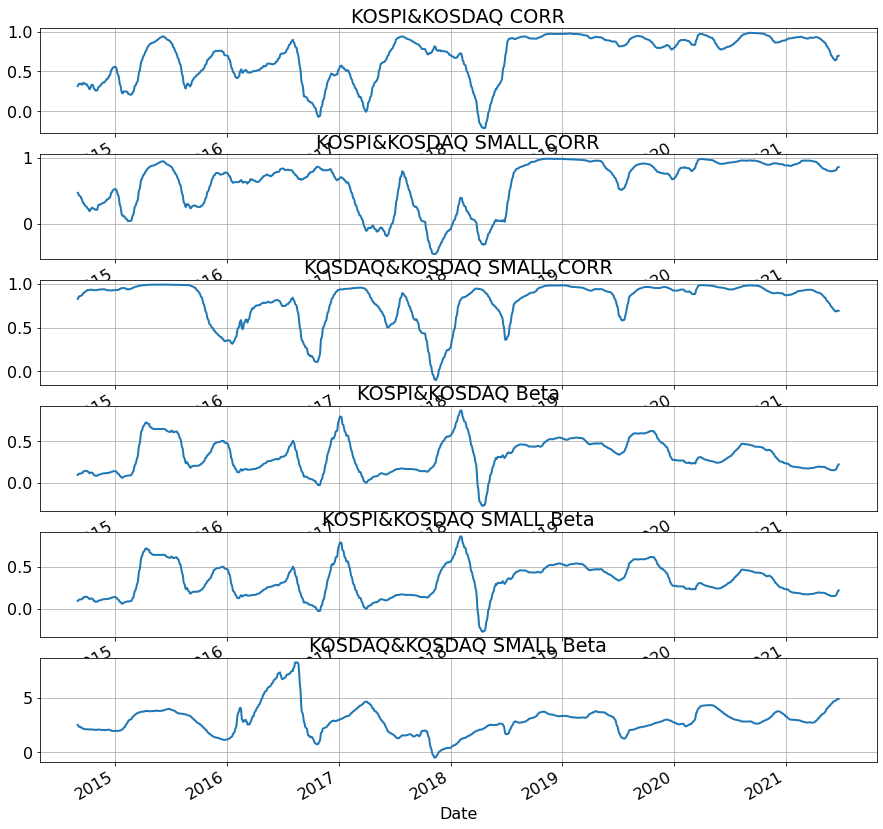

In [7]:
# 6개월 롤링 상관성 그래프
plt.subplot(6, 1, 1)
plt.title('KOSPI&KOSDAQ CORR')
ks_kq.plot()

plt.subplot(6, 1, 2)
plt.title('KOSPI&KOSDAQ SMALL CORR')
ks_kq_sm.plot()

plt.subplot(6, 1, 3)
plt.title('KOSDAQ&KOSDAQ SMALL CORR')
kd_kq_sm.plot()

# 6개월 롤링 베타 그래프
plt.subplot(6, 1, 4)
plt.title('KOSPI&KOSDAQ Beta')
b_ks_kq.plot()

plt.subplot(6, 1, 5)
plt.title('KOSPI&KOSDAQ SMALL Beta')
b_ks_kq_sm.plot()

plt.subplot(6, 1, 6)
plt.title('KOSDAQ&KOSDAQ SMALL Beta')
b_kq_kq_sm.plot()

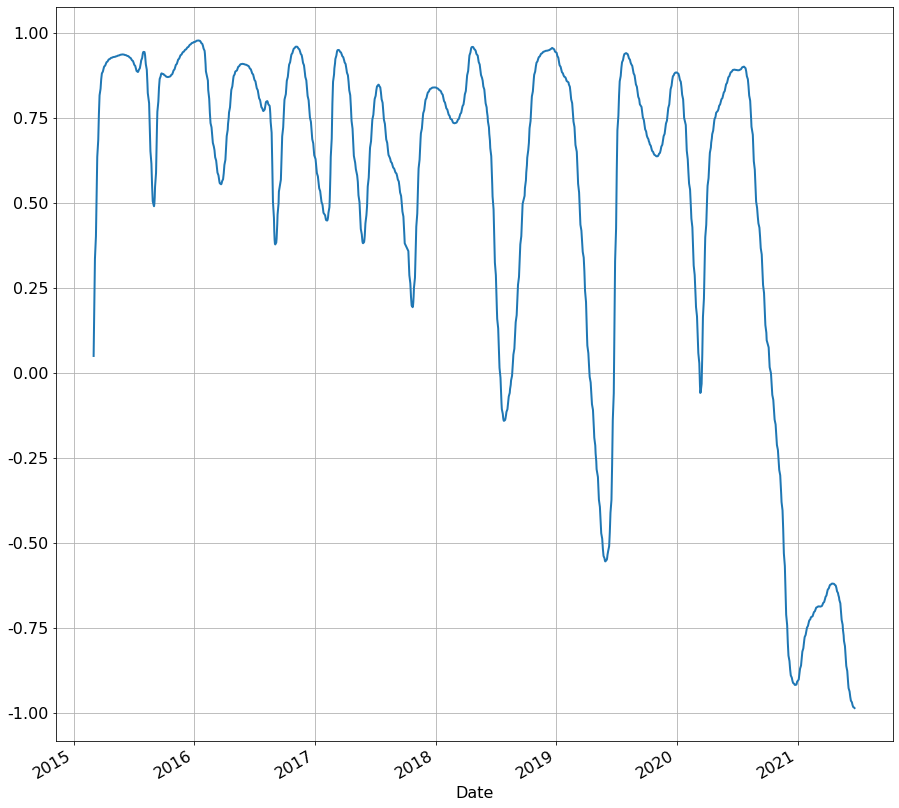

In [8]:
# 코스닥, 코스닥소형 지수 상관성&베타의 상관성
ks_kssm_corr_beta_corr = rolling_corr(b_kq_kq_sm, kd_kq_sm, 6)

# 코스닥, 코스닥소형 지수 상관성&베타의 상관성 그래프
ks_kssm_corr_beta_corr.plot()